### <div class="alert alert-block alert-success">Homework 1 --- Group 5: Ruiyuan Luan, Shuang Peng, Chenyi Zhang, Betty Chen</div>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<div class="alert alert-block alert-success"> Part I - Linear Regression</div>

In [2]:
housing = pd.read_csv('home_data.csv',index_col = 0)

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float

In [4]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 1. Selection and summary statistics:

In [5]:
highest_avg_zipcode = housing.groupby('zipcode')['price'].mean().nlargest(1).index[0]
print('Zipcode',highest_avg_zipcode, 'has the highest average house sale price')

Zipcode 98039 has the highest average house sale price


In [6]:
highest_avg_price = housing[housing.zipcode == highest_avg_zipcode].price.mean()
print('For zipcode',highest_avg_zipcode, 'the average house sale price is $',highest_avg_price)

For zipcode 98039 the average house sale price is $ 2160606.6


### 2. Filtering data:

In [7]:
filtered_house = housing[(housing.sqft_living > 2000) & (housing.sqft_living < 4000)]

In [8]:
fraction_for_filtered_house = len(filtered_house)/len(housing)

In [9]:
print('The fraction of all house have sqft_living higher than 2000 sqft but no larger than 4000 sqft is', fraction_for_filtered_house)

The fraction of all house have sqft_living higher than 2000 sqft but no larger than 4000 sqft is 0.4215518437977143


### 3. Visualization:

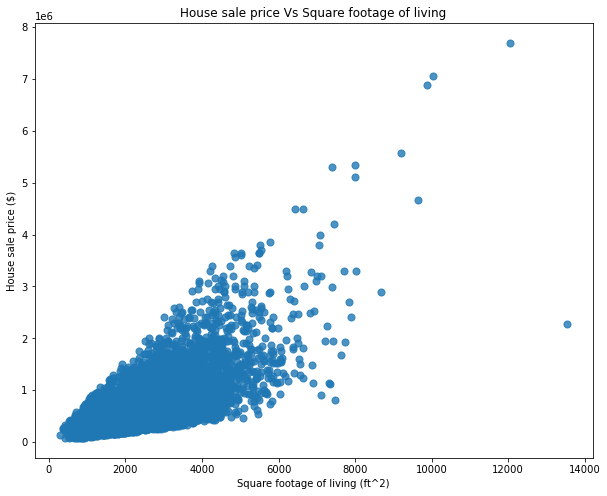

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(housing.sqft_living,housing.price, marker= 'o', s=50, alpha=0.8)
plt.title('House sale price Vs Square footage of living')
plt.ylabel('House sale price ($)')
plt.xlabel('Square footage of living (ft^2)')
plt.show()

### 4. Building regression models

#### 4.1 Build a regression model to predict house prices using just ‘sqft_living’ and add the trend line in the plot in part 3. Report the intercept and slope.

In [11]:
X=housing[['sqft_living']]
X.shape

(21613, 1)

In [12]:
y=housing.price
y.shape

(21613,)

In [13]:
linreg = LinearRegression().fit(X, y)

In [14]:
print('linear model coeff (a): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg.score(X, y)))

linear model coeff (a): [280.62356663]
linear model intercept (b): -43580.740
R-squared score: 0.493


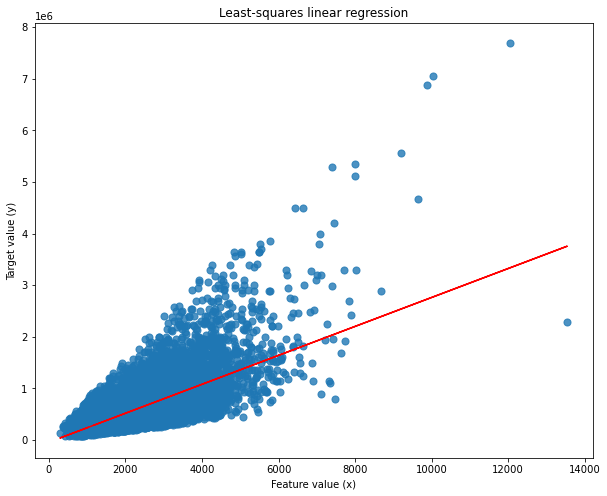

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

#### 4.2 Using this simple regression model, what is the predicted price for a house with 2650 sqft?

In [16]:
# Predicted price for a house with 2650 sqft
X_new = [[2650]]
linreg.predict(X_new)
print('The predicted price for a house with 2650 sqft is $', round(float(linreg.predict(X_new)[0]),2))

The predicted price for a house with 2650 sqft is $ 700071.71


#### 4.3 Using this simple regression model, what is the estimated square-feet for a house costing $800,000?

In [17]:
# estimated square-feet for a house costing $800,000
coef=float(linreg.coef_)
intercept = float(linreg.intercept_)
sqft_predict = (800000-intercept)/coef
print('The predicted suqare feet of living for a house cost $800,000 is',round(sqft_predict),'ft^2')

The predicted suqare feet of living for a house cost $800,000 is 3006 ft^2


#### 4.4 Build a regression model to predict house prices using just ‘bedrooms’. Report the intercept and slope.

In [18]:
X_bedroom = housing[['bedrooms']]
X_bedroom.shape

(21613, 1)

In [19]:
y.shape

(21613,)

In [22]:
linreg_bedroom = LinearRegression().fit(X_bedroom , y)

In [23]:
print('linear model coeff (a): {}'
     .format(linreg_bedroom.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg_bedroom.intercept_))

linear model coeff (a): [121716.12623836]
linear model intercept (b): 129802.357


#### 4.5 Using this simple regression model, what is the predicted price for a house with 3 bedrooms?

In [24]:
X_3bedroom = [[3]]
linreg_bedroom.predict(X_3bedroom)
print('The predicted price for a house has 3 bedrooms is $', round(float(linreg_bedroom.predict(X_3bedroom)[0]),2))

The predicted price for a house has 3 bedrooms is $ 494950.74


#### 4.6 Compute and compare the RMSE (root mean squared error) of the two models.

In [40]:
# RMSE for model predict house price using sqft_living
housing_predictions = linreg.predict(X)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

261440.79072267728

In [41]:
# RMSE for model predict house price using bedrooms
housing_predictions_wbedroom = linreg_bedroom.predict(X_bedroom)
lin_mse_bedroom = mean_squared_error(y, housing_predictions_wbedroom)
lin_rmse_bedroom = np.sqrt(lin_mse_bedroom)
lin_rmse_bedroom

349230.1491907254

In [42]:

print('The RMSE for model predict house price using sqft_living is',lin_rmse)
print('The RMSE for model predict house price using bedrooms is',lin_rmse_bedroom)

The RMSE for model predict house price using sqft_living is 261440.79072267728
The RMSE for model predict house price using bedrooms is 349230.1491907254


<div class="alert alert-block alert-success"> Part II - KNN </div>

### 1. Load the breast cancer dataset.

In [25]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [26]:
data 

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [27]:
print("Keys of load_breast_cancer:\n", data.keys())

Keys of load_breast_cancer:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [28]:
print("Target names:", data['target_names'])

Target names: ['malignant' 'benign']


### 2. Provide an explanation of the data set.

In [29]:
print(data['DESCR'][::] + "\n...")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [37]:
print("Type of data:", type(data['data']))

Type of data: <class 'numpy.ndarray'>


In [38]:
print("Shape of data:", data['data'].shape)

Shape of data: (569, 30)


In [39]:
print("Type of target:", type(data['target']))

Type of target: <class 'numpy.ndarray'>


In [40]:
print("Shape of target:", data['target'].shape)

Shape of target: (569,)


In [41]:
print("Target:\n", data['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1

### 3. What are the features in the data set?

In [42]:
print("Feature names:\n", data['feature_names'])

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 4. Create some basic visualization of the data set.

array([[<AxesSubplot:xlabel='mean radius', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean texture', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean smoothness', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean compactness', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean concavity', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean concave points', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean symmetry', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean fractal dimension', ylabel='mean radius'>,
        <AxesSubplot:xlabel='radius error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='texture error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='perimeter error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='area error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='smooth

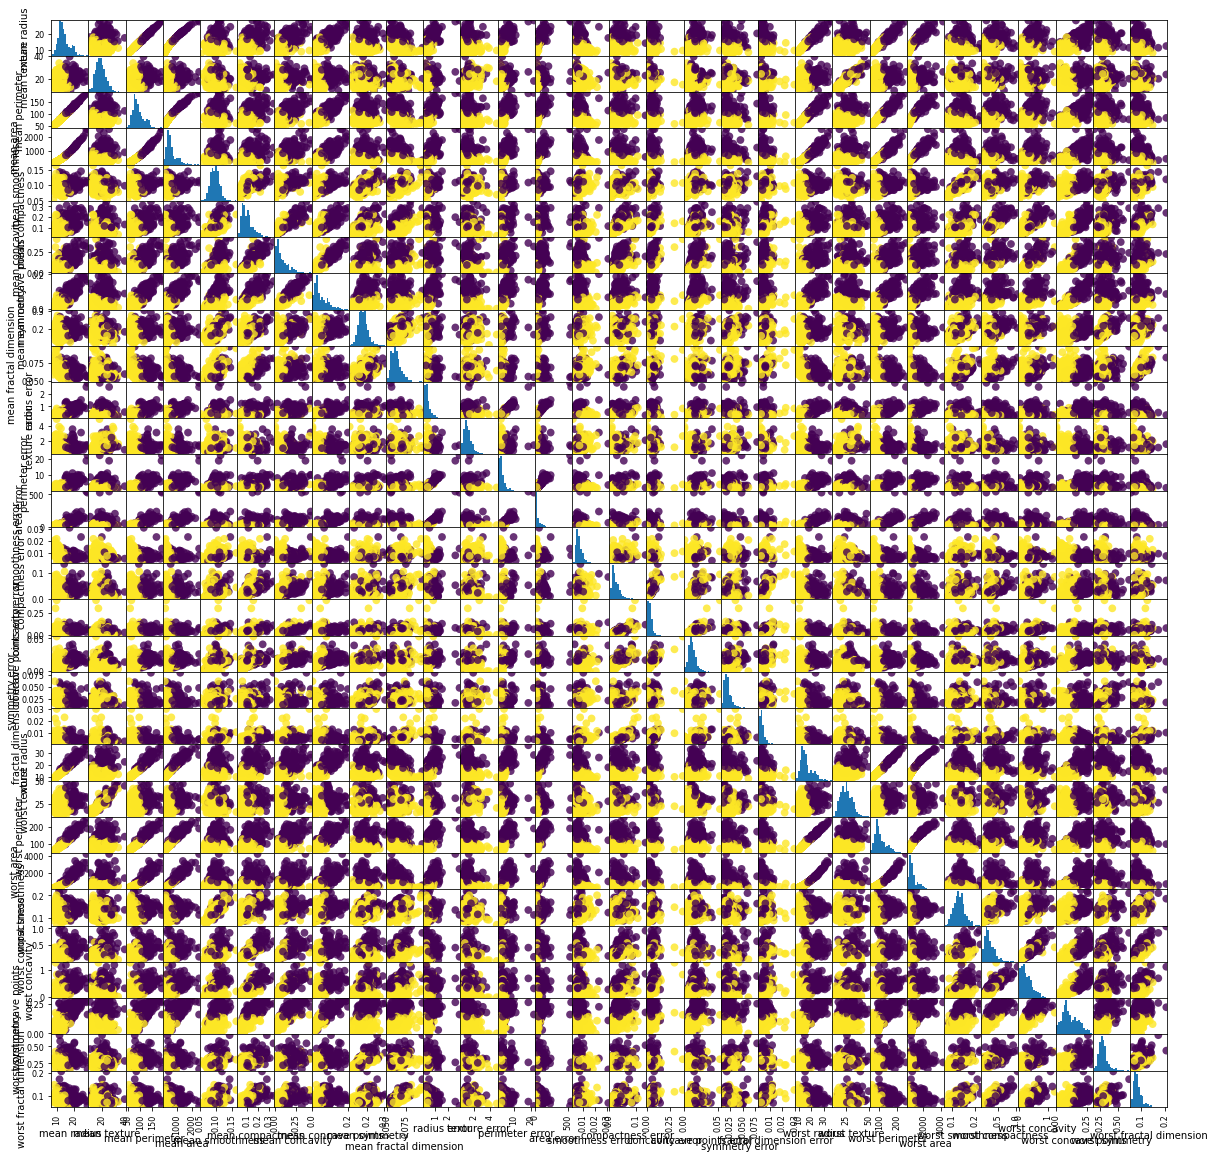

In [43]:
# create dataframe from data 
plt.rcParams['image.cmap'] = "viridis"
data_dataframe = pd.DataFrame(data.data, columns=data.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(data_dataframe, c=data.target, figsize=(20, 20),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

### 5. Split the data into training set (80%) and test set (20%) using random_state = 0.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'], test_size=0.2 ,random_state=0)

In [45]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (455, 30)
y_train shape: (455,)


In [46]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (114, 30)
y_test shape: (114,)


### 6. Build KNN models with n_neighbors = {1, 2, 3, 4, 5}. Compare their performance on the training set and test set. Which one is the best model?

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.91


In [49]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.89


In [50]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.91


In [51]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.92


In [54]:
print('Overall, when n_neighbor=5 is the best model since it has highest test set score.')

Overall, when n_neighbor=5 is the best model since it has highest test set score.
